In [1]:
! git clone https://github.com/huggingface/peft
! pip install -r ./peft/examples/lora_dreambooth/requirements.txt
! pip install --upgrade tensorflow
! pip install git+https://github.com/huggingface/peft

Cloning into 'peft'...
remote: Enumerating objects: 10660, done.
remote: Counting objects: 100% (1678/1678), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 10660 (delta 1570), reused 1463 (delta 1463), pack-reused 8982 (from 2)
Receiving objects: 100% (10660/10660), 14.10 MiB | 17.63 MiB/s, done.
Resolving deltas: 100% (7339/7339), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:0

In [2]:
import pandas as pd
from pathlib import Path

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ktrndy (ktrndy-sber) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [4]:
! accelerate launch '/content/drive/My Drive/Colab_Notebooks/Diffusion/train_dreambooth.py' \
  --pretrained_model_name_or_path="stable-diffusion-v1-5/stable-diffusion-v1-5"  \
  --instance_data_dir='/content/drive/My Drive/Colab_Notebooks/Diffusion/pusheen_data' \
  --output_dir='/content/drive/My Drive/Colab_Notebooks/Diffusion/model_output'\
  --instance_prompts_path='/content/drive/My Drive/Colab_Notebooks/Diffusion/metadata.csv' \
  --train_text_encoder \
  --num_dataloader_workers=1 \
  --class_prompt="a cat" \
  --num_validation_images=5 \
  --validation_prompt='Sticker of funny_cat Pusheen sitting with a cup of coffee and a cherry pie.' \
  --seed=42 \
  --resolution=512 \
  --train_batch_size=4 \
  --scale_lr \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --use_lora \
  --lora_r 16 \
  --lora_alpha 32 \
  --lora_text_encoder_r 8 \
  --lora_text_encoder_alpha 8 \
  --learning_rate=1e-4 \
  --gradient_accumulation_steps=1 \
  --gradient_checkpointing \
  --max_train_steps=1500 \
  --report_to='wandb' \
  --wandb_key='d71eedaa036cc2c944b68c81dbc3fa13d1660a62' \
  --wandb_project_name='funny_cat_pusheen'

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-02-09 14:45:23.292135: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-09 14:45:23.310713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739112323.332313    3819 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register 

In [5]:
! ls '/content/wandb/run-20250209_144528-73xqgg52/files/media/images'

validation_1001_169b2d5bb56af205d2d5.png  validation_201_c3699b25f8a050422b15.png
validation_1001_30cad58ddc9db8ca9a57.png  validation_201_eaee3cfcbf6218a6ba7b.png
validation_1001_4f8496be804be364b605.png  validation_301_024295125a93c376f37f.png
validation_1001_7abd4803a59bbe2f5840.png  validation_301_02f17e459db905743397.png
validation_1001_7ff6a71b70d62b1c68d0.png  validation_301_8f222494ccb3fb7ffe29.png
validation_101_14062be25fbddb88b18b.png   validation_301_90005d3c7cafc6beb0f5.png
validation_101_1fa7bced899e36e06c53.png   validation_301_f8369230b7ae28ccbb6e.png
validation_101_2b6665b27207cab7de6c.png   validation_401_361ce3fe16c541807fbf.png
validation_101_644ccb236ce716d25ecd.png   validation_401_38fa76aa271053f2b2e1.png
validation_101_df56ad82c0830bffc230.png   validation_401_398432741179d76f56eb.png
validation_1101_07c7a681244a9cb010f7.png  validation_401_6c089be3546335e84e76.png
validation_1101_40dc7a9383f792ad2f80.png  validation_401_83edbf6b845869d6239a.png
validation_1101_

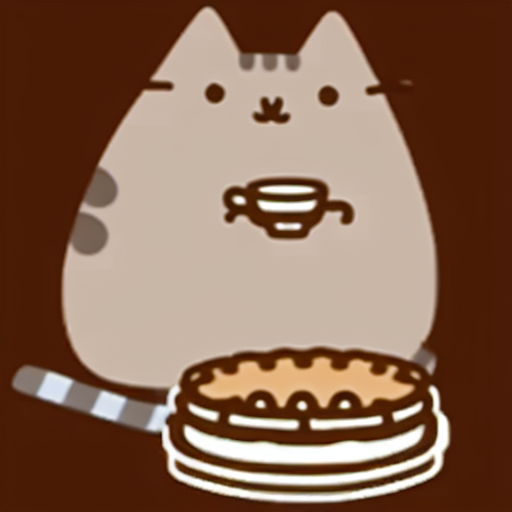

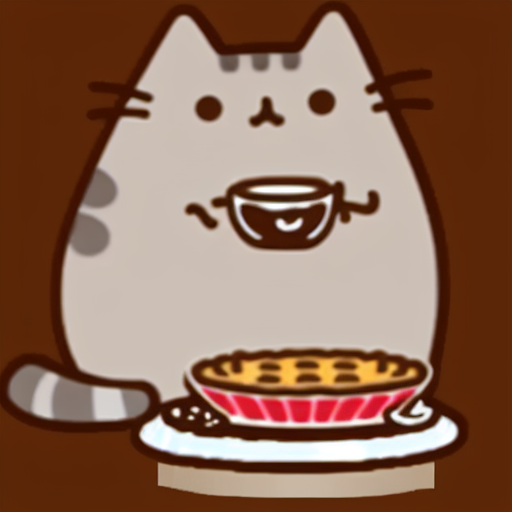

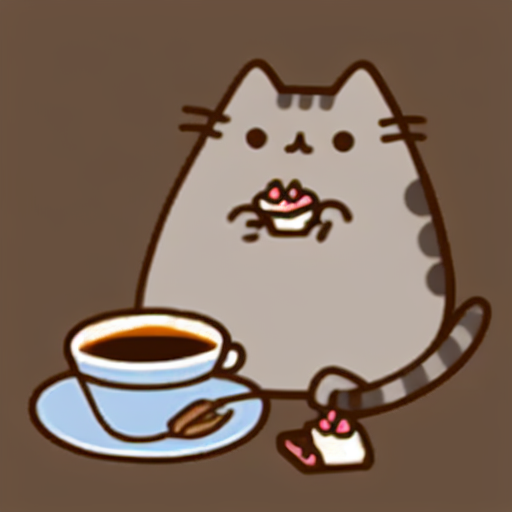

In [9]:
from PIL import Image
import IPython.display as display

root_path = '/content/wandb/run-20250209_144528-73xqgg52/files/media/images'
for img_path in ['/validation_1201_cf9fcd8439b593c21b94.png',
                 '/validation_1301_4b6f79be1d2e46132393.png',
                 '/validation_1401_6c7df3b813051b5e850f.png']:
  image = Image.open(root_path + img_path)
  display.display(image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

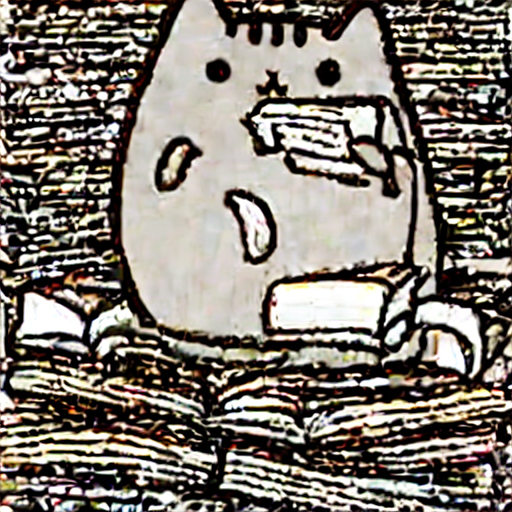

In [97]:
from diffusers import StableDiffusionPipeline
from peft import PeftModel
import torch


device = "cuda" if torch.cuda.is_available() else "cpu"
model_id_default = "stable-diffusion-v1-5/stable-diffusion-v1-5"

if torch.cuda.is_available():
    torch_dtype = torch.float16
else:
    torch_dtype = torch.float32

MAX_SEED = np.iinfo(np.int32).max
MAX_IMAGE_SIZE = 1024


base_model = "stable-diffusion-v1-5/stable-diffusion-v1-5"
lora_scale = 0.95
prompt = "Sticker of funny_cat Pusheen reading a book."
negative_prompt = "bad quality, artifacts, low-res"
width=512
height=512
seed=42
guidance_scale=7.0
num_inference_steps=30


generator = torch.Generator(device).manual_seed(seed)
pipe = StableDiffusionPipeline.from_pretrained(base_model, torch_dtype=torch_dtype).to(device)

pipe.unet = PeftModel.from_pretrained(pipe.unet, "/content/drive/My Drive/Colab_Notebooks/Diffusion/model_output/unet")
pipe.text_encoder = PeftModel.from_pretrained(pipe.text_encoder, "/content/drive/My Drive/Colab_Notebooks/Diffusion/model_output/text_encoder")
pipe.safety_checker = None

pipe.unet.load_state_dict({k: lora_scale*v for k, v in pipe.unet.state_dict().items()})
pipe.text_encoder.load_state_dict({k: lora_scale*v for k, v in pipe.text_encoder.state_dict().items()})

pipe.to(device)

pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    width=width,
    height=height,
    generator=generator,
).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

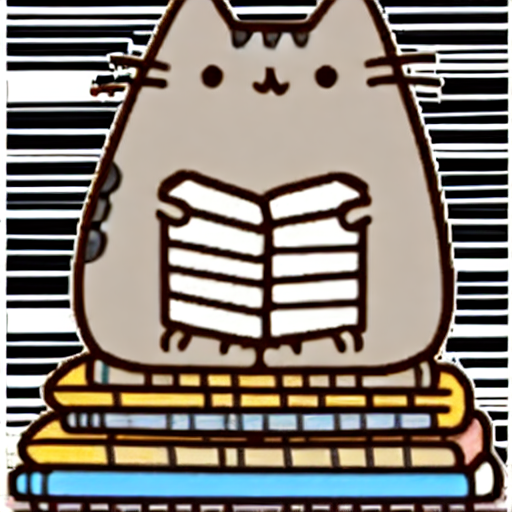

In [98]:
lora_scale = 1.0
num_inference_steps=30

generator = torch.Generator(device).manual_seed(seed)
pipe = StableDiffusionPipeline.from_pretrained(base_model, torch_dtype=torch_dtype).to(device)

pipe.unet = PeftModel.from_pretrained(pipe.unet, "/content/drive/My Drive/Colab_Notebooks/Diffusion/model_output/unet")
pipe.text_encoder = PeftModel.from_pretrained(pipe.text_encoder, "/content/drive/My Drive/Colab_Notebooks/Diffusion/model_output/text_encoder")
pipe.safety_checker = None

pipe.unet.load_state_dict({k: lora_scale*v for k, v in pipe.unet.state_dict().items()})
pipe.text_encoder.load_state_dict({k: lora_scale*v for k, v in pipe.text_encoder.state_dict().items()})

pipe.to(device)

pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    width=width,
    height=height,
    generator=generator,
).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/peft/config.py:162: UserWarning: Unexpected keyword arguments ['corda_config'] for class LoraConfig, these are ignored. This probably means that you're loading a configuration file that was saved using a higher version of the library and additional parameters have been introduced since. It is highly recommended to upgrade the PEFT version before continuing (e.g. by running `pip install -U peft`).
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

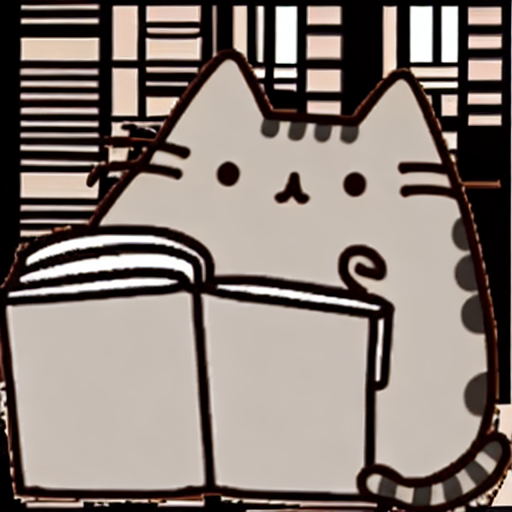

In [92]:
lora_scale = 1.0
num_inference_steps=50
seed = 777

generator = torch.Generator(device).manual_seed(seed)
pipe = StableDiffusionPipeline.from_pretrained(base_model, torch_dtype=torch.float16).to(device)

pipe.unet = PeftModel.from_pretrained(pipe.unet, "/content/drive/My Drive/Colab_Notebooks/Diffusion/model_output/unet")
pipe.text_encoder = PeftModel.from_pretrained(pipe.text_encoder, "/content/drive/My Drive/Colab_Notebooks/Diffusion/model_output/text_encoder")
pipe.safety_checker = None

pipe.unet.load_state_dict({k: lora_scale*v for k, v in pipe.unet.state_dict().items()})
pipe.text_encoder.load_state_dict({k: lora_scale*v for k, v in pipe.text_encoder.state_dict().items()})

pipe.to(device)

pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    width=width,
    height=height,
    generator=generator,
).images[0]